In [1]:
from gates import *

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [3]:
import numpy as np

In [4]:
qc = QuantumCircuit(4)

In [5]:
qc.cx(0,2)

In [6]:
qc.cx(1,2)

In [7]:
qc.x(2)

In [8]:
qc.x(1)

In [9]:
qc.ccx(0,1,3)

In [10]:
qc.x(1)

In [11]:
qc.draw()

q_0: |0>──■──────────────■───────
          │       ┌───┐  │  ┌───┐
q_1: |0>──┼────■──┤ X ├──■──┤ X ├
        ┌─┴─┐┌─┴─┐├───┤  │  └───┘
q_2: |0>┤ X ├┤ X ├┤ X ├──┼───────
        └───┘└───┘└───┘┌─┴─┐     
q_3: |0>───────────────┤ X ├─────
                       └───┘

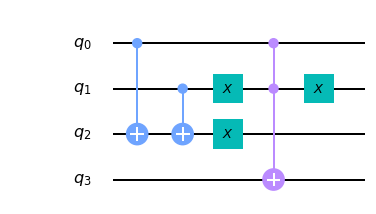

In [12]:
qc.draw(output='mpl')